# Tweepy for Data Science

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

## API Connection

In [2]:
#!pip insall tweepy - install tweepy with pip
#conda install -c conda-forge tweepy --> install tweepy for anaconda
# conda install -c conda-forge/label/cf201901 tweepy --> install tweepy for anaconda
import tweepy, codecs


consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''


auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [3]:
# a tweet from your account
"""api.update_status("Lets Start #datascience #donotwait")"""

'api.update_status("Lets Start #datascience #donotwait")'

## Collecting Data from Twitter

In [4]:
erdgn = api.me()

In [5]:
#user name
erdgn.screen_name

'ahmet_erdogan0'

In [6]:
#your followers count
erdgn.followers_count

35

In [ ]:
erdgn.friends

In [ ]:
#your friends user names
for friend in erdgn.friends(count = 200):
    print(friend.screen_name)

In [ ]:
dir(erdgn)

User basic informations

In [10]:
user = api.get_user(id = "cahit_isleyen")

In [11]:
#can be used with user
dir(user)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_api',
 '_json',
 'can_media_tag',
 'contributors_enabled',
 'created_at',
 'default_profile',
 'default_profile_image',
 'description',
 'entities',
 'favourites_count',
 'follow',
 'follow_request_sent',
 'followed_by',
 'followers',
 'followers_count',
 'followers_ids',
 'following',
 'friends',
 'friends_count',
 'geo_enabled',
 'has_extended_profile',
 'id',
 'id_str',
 'is_translation_enabled',
 'is_translator',
 'lang',
 'listed_count',
 'lists',
 'lists_memberships',
 'lists_subscriptions',
 'location',
 'name',
 'notifications',
 'parse',
 'parse_list',
 'profile_background_color',
 'profile_bac

In [12]:
#user name of user 
user.screen_name

'cahit_isleyen'

In [13]:
#user followers count
user.followers_count

64

In [14]:
#info for user
?user

In [15]:
user.profile_image_url

'http://pbs.twimg.com/profile_images/1192818998548807684/PI4Gd1ji_normal.jpg'

User hometimeline

In [16]:
#user home time line

public_tweets = api.home_timeline(count = 1000)

In [ ]:
public_tweets

In [ ]:
for tweet in public_tweets:
    print(tweet.text)

In [ ]:
name = "cahit_isleyen"
tweet_count = 100

#user time line
user_timelinee = api.user_timeline(id = name, count = tweet_count)

for i in user_timelinee:
    print(i.text)

In [ ]:
# Retweets Count
retweets = api.retweets_of_me()
for retweet in retweets:
    print(retweet.text)

In [21]:
# tweets about special Hastag
results = api.search(q = "#datascience", 
                    result_type = "recent", 
                     lang = "tr", 
                     count = 200)

In [ ]:
results

In [ ]:
for retweet in results:
    print(retweet.text)

In [24]:
# Convert to Dataframe

In [25]:
import pandas as pd

In [26]:
def tweets_df(results):
    id_list = [tweet.id for tweet  in results]
    data_set = pd.DataFrame(id_list, columns = ["id"]) #get id
    
    data_set["text"] = [tweet.text for tweet in results] #get tweet texts
    data_set["created_at"] = [tweet.created_at for tweet in results] #get tweet created date
    data_set["retweet_count"] = [tweet.retweet_count for tweet in results] #get retweets count of tweet
    data_set["user_screen_name"] = [tweet.author.screen_name for tweet in results] #get user name of tweet
    data_set["user_followers_count"] = [tweet.author.followers_count for tweet in results] #get user followers count
    data_set["user_location"] = [tweet.author.location for tweet in results] #get user location
    data_set["Hashtags"] = [tweet.entities.get('hashtags') for tweet in results] #get. user hastags
    
    return data_set

In [27]:
data = tweets_df(results)

In [ ]:
data["text"]

In [29]:
data.to_csv("twitter.csv")

In [ ]:
data

# Analysing to Profil

In [31]:
# Basic Profil Informations

In [32]:
erdgn = api.get_user("ahmet_erdogan0")

In [33]:
erdgn.name

'birgaripmühendis'

In [34]:
erdgn.id

3514362376

In [35]:
erdgn.url

In [36]:
erdgn.verified

False

In [37]:
erdgn.location

'Istanbul, Turkey'

In [38]:
erdgn.statuses_count

220

In [39]:
erdgn.followers_count

35

In [40]:
erdgn.favourites_count

168

In [41]:
erdgn.friends_count

100

In [42]:
tweets = api.user_timeline(id = "ahmet_erdogan0")

In [ ]:
for i in tweets:
    print(i.text)

In [44]:
def timeline_df1(tweets):
    idler = [tweet.id for tweet  in tweets]
    df = pd.DataFrame(idler, columns = ["id"]) #get tweet id
    
    df["created_at"] = [tweet.created_at for tweet in tweets] #get user tweet created date
    df["text"] = [tweet.text for tweet in tweets] #get tweet text
    df["favorite_count"] = [tweet.favorite_count for tweet in tweets] #get tweet favorite count
    df["retweet_count"] = [tweet.retweet_count for tweet in tweets] #get tweet retweet count
    df["source"] = [tweet.source for kisi in tweets] #get which write from device was 
    return df

In [ ]:
timeline_df1(tweets)

In [46]:
# the timeline_df function almost same with the previous timeline_df1 func., just used lambda in thih func
def timeline_df(tweets):
    df = pd.DataFrame()
    df['id'] = list(map(lambda tweet: tweet.id, tweets)) #get user tweet created date
    
    df['created_at'] = list(map(lambda tweet: tweet.created_at, tweets)) #get user tweet created date
    df['text'] = list(map(lambda tweet: tweet.text, tweets)) #get tweet text
    df['favorite_count'] = list(map(lambda tweet: tweet.favorite_count, tweets)) #get tweet favorite count
    df['retweet_count'] = list(map(lambda tweet: tweet.retweet_count, tweets)) #get tweet retweet count
    df['source'] = list(map(lambda tweet: tweet.source, tweets)) #get which write from device was 
    return df

In [47]:
tweets = api.user_timeline(id = "NASA", count = 200)
df = timeline_df(tweets)

In [48]:
?api.user_timeline

In [49]:
?tweets

In [50]:
df.shape

(200, 6)

In [51]:
df.head()

,id,created_at,text,favorite_count,retweet_count,source
0,1203388243577839617,2019-12-07 18:58:09,RT @Space_Station: The @SpaceX #Dragon resuppl...,0,253,Twitter for iPhone
1,1203373858889359366,2019-12-07 18:01:00,RT @NASA_Johnson: 47 years after his launch to...,0,142,Sprinklr
2,1203339813556015111,2019-12-07 15:45:43,Behold: The beauty of our home planet! 😍\n\nOn...,6377,1420,Sprinklr
3,1203148625548894208,2019-12-07 03:06:00,RT @Astro_Christina: All in a @Space_Station n...,0,1134,Sprinklr
4,1203132298562088960,2019-12-07 02:01:07,This week: \n\n🆒 Spacewalkers install a new co...,2368,413,Sprinklr


In [52]:
#profil most

In [53]:
df.sort_values("favorite_count", ascending = False).head()

,id,created_at,text,favorite_count,retweet_count,source
160,1198738094184390656,2019-11-24 23:00:07,"Each second, 1.5 million tons of solar materia...",49099,9548,Sprinklr
95,1200965494225944578,2019-12-01 02:31:01,"Next week, a #Dragon will race into the sky to...",17102,1956,Sprinklr
70,1201597561720725506,2019-12-02 20:22:37,The #Chandrayaan2 Vikram lander has been found...,16143,5500,Sprinklr
132,1200070663345725440,2019-11-28 15:15:17,Fun fact: #AstronautSnoopy made his first debu...,14987,3475,Sprinklr
115,1200421182086008834,2019-11-29 14:28:07,Visualize a mind-bending black hole 😱\n\nThe g...,14982,3343,Sprinklr


In [54]:
df.sort_values("retweet_count", ascending = False)[["text","retweet_count"]].iloc[0:3]

,text,retweet_count
160,"Each second, 1.5 million tons of solar materia...",9548
70,The #Chandrayaan2 Vikram lander has been found...,5500
132,Fun fact: #AstronautSnoopy made his first debu...,3475


In [55]:
df.sort_values("favorite_count", ascending = False)[["text","favorite_count"]].iloc[0:3]

,text,favorite_count
160,"Each second, 1.5 million tons of solar materia...",49099
95,"Next week, a #Dragon will race into the sky to...",17102
70,The #Chandrayaan2 Vikram lander has been found...,16143


## Retweet & Extracting Distributions of Favorite Numbers

In [56]:
df.head()

,id,created_at,text,favorite_count,retweet_count,source
0,1203388243577839617,2019-12-07 18:58:09,RT @Space_Station: The @SpaceX #Dragon resuppl...,0,253,Twitter for iPhone
1,1203373858889359366,2019-12-07 18:01:00,RT @NASA_Johnson: 47 years after his launch to...,0,142,Sprinklr
2,1203339813556015111,2019-12-07 15:45:43,Behold: The beauty of our home planet! 😍\n\nOn...,6377,1420,Sprinklr
3,1203148625548894208,2019-12-07 03:06:00,RT @Astro_Christina: All in a @Space_Station n...,0,1134,Sprinklr
4,1203132298562088960,2019-12-07 02:01:07,This week: \n\n🆒 Spacewalkers install a new co...,2368,413,Sprinklr


In [57]:
%config InlineBackend.figure_format = 'retina'
import seaborn as sns
import matplotlib.pyplot as plt

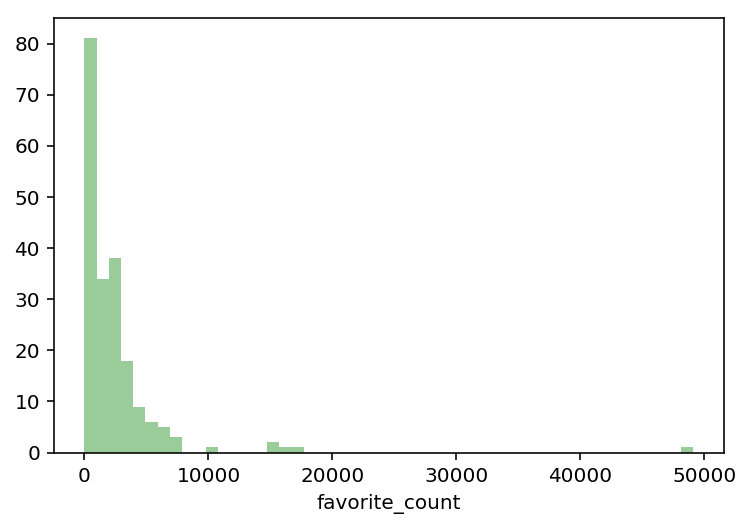

In [58]:
sns.distplot(df.favorite_count, kde = False, color = "green");

(-100, 5000)

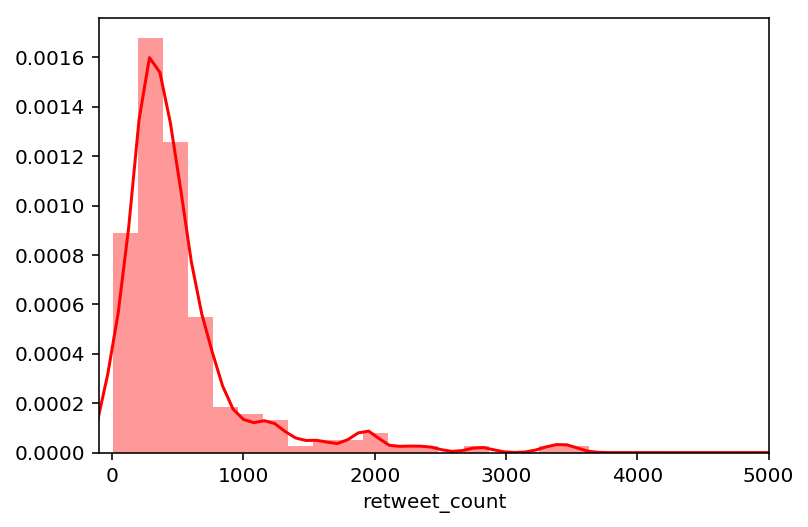

In [59]:
sns.distplot(df.retweet_count, color = "red");
plt.xlim(-100, 5000)

## Tweet Analysis

In [60]:
df.head() #check the time in the data

,id,created_at,text,favorite_count,retweet_count,source
0,1203388243577839617,2019-12-07 18:58:09,RT @Space_Station: The @SpaceX #Dragon resuppl...,0,253,Twitter for iPhone
1,1203373858889359366,2019-12-07 18:01:00,RT @NASA_Johnson: 47 years after his launch to...,0,142,Sprinklr
2,1203339813556015111,2019-12-07 15:45:43,Behold: The beauty of our home planet! 😍\n\nOn...,6377,1420,Sprinklr
3,1203148625548894208,2019-12-07 03:06:00,RT @Astro_Christina: All in a @Space_Station n...,0,1134,Sprinklr
4,1203132298562088960,2019-12-07 02:01:07,This week: \n\n🆒 Spacewalkers install a new co...,2368,413,Sprinklr


In [61]:
#add new column to data for tweet created hour (use lambda for easyly)
#We can use for time analysing
df["tweet_hour"] = df["created_at"].apply(lambda x: x.strftime("%H")) #H is hour

In [62]:
df.head()

,id,created_at,text,favorite_count,retweet_count,source,tweet_hour
0,1203388243577839617,2019-12-07 18:58:09,RT @Space_Station: The @SpaceX #Dragon resuppl...,0,253,Twitter for iPhone,18
1,1203373858889359366,2019-12-07 18:01:00,RT @NASA_Johnson: 47 years after his launch to...,0,142,Sprinklr,18
2,1203339813556015111,2019-12-07 15:45:43,Behold: The beauty of our home planet! 😍\n\nOn...,6377,1420,Sprinklr,15
3,1203148625548894208,2019-12-07 03:06:00,RT @Astro_Christina: All in a @Space_Station n...,0,1134,Sprinklr,03
4,1203132298562088960,2019-12-07 02:01:07,This week: \n\n🆒 Spacewalkers install a new co...,2368,413,Sprinklr,02


In [63]:
#values convert to numeric values for analysing
df["tweet_hour"] = pd.to_numeric(df["tweet_hour"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
id                200 non-null int64
created_at        200 non-null datetime64[ns]
text              200 non-null object
favorite_count    200 non-null int64
retweet_count     200 non-null int64
source            200 non-null object
tweet_hour        200 non-null int64
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 11.1+ KB


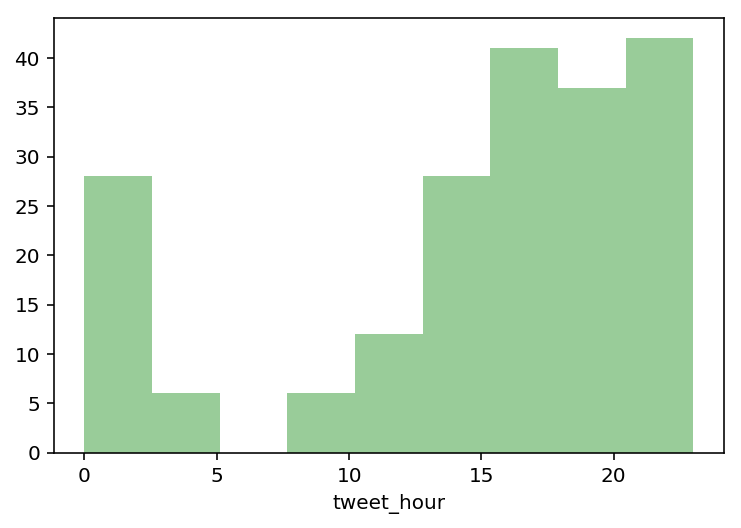

In [64]:
#histogram for tweet hours analysng
sns.distplot(df["tweet_hour"], kde = False, color ="green");

NASA is not tweet between at 4 - at 9 

In [65]:
df["tweet_days"] = df["created_at"].dt.weekday_name

In [66]:
df.head()

,id,created_at,text,favorite_count,retweet_count,source,tweet_hour,tweet_days
0,1203388243577839617,2019-12-07 18:58:09,RT @Space_Station: The @SpaceX #Dragon resuppl...,0,253,Twitter for iPhone,18,Saturday
1,1203373858889359366,2019-12-07 18:01:00,RT @NASA_Johnson: 47 years after his launch to...,0,142,Sprinklr,18,Saturday
2,1203339813556015111,2019-12-07 15:45:43,Behold: The beauty of our home planet! 😍\n\nOn...,6377,1420,Sprinklr,15,Saturday
3,1203148625548894208,2019-12-07 03:06:00,RT @Astro_Christina: All in a @Space_Station n...,0,1134,Sprinklr,3,Saturday
4,1203132298562088960,2019-12-07 02:01:07,This week: \n\n🆒 Spacewalkers install a new co...,2368,413,Sprinklr,2,Saturday


In [67]:
#count groupby day
df.groupby("tweet_days").count()["id"]

tweet_days
Friday       51
Monday       30
Saturday     23
Sunday       12
Thursday     42
Tuesday      18
Wednesday    24
Name: id, dtype: int64

nasa usually seems to be using friday to tweet

In [68]:
day_freq = df.groupby("tweet_days").count()["id"]

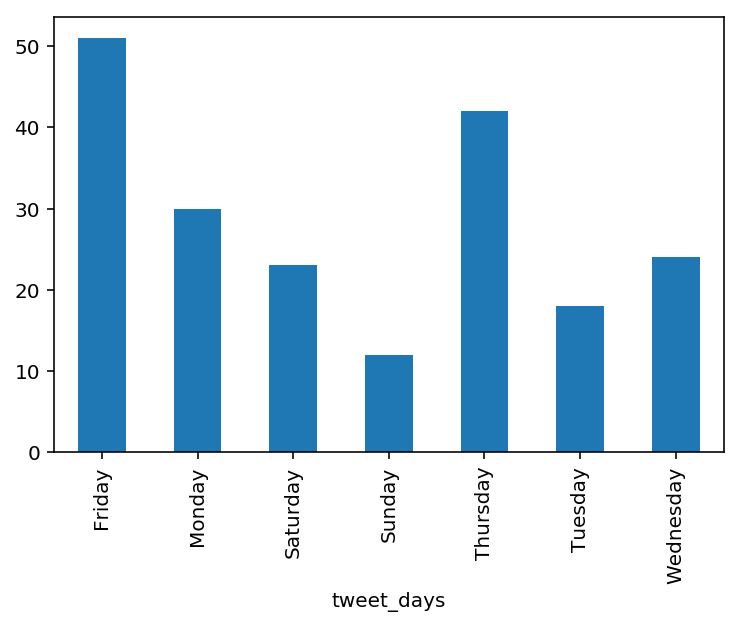

In [69]:
day_freq.plot.bar(x = "tweet_days", y = "id")

## Tweet Describing Disposal Resources (devices)

In [70]:
source_freq = df.groupby("source").count()["id"]

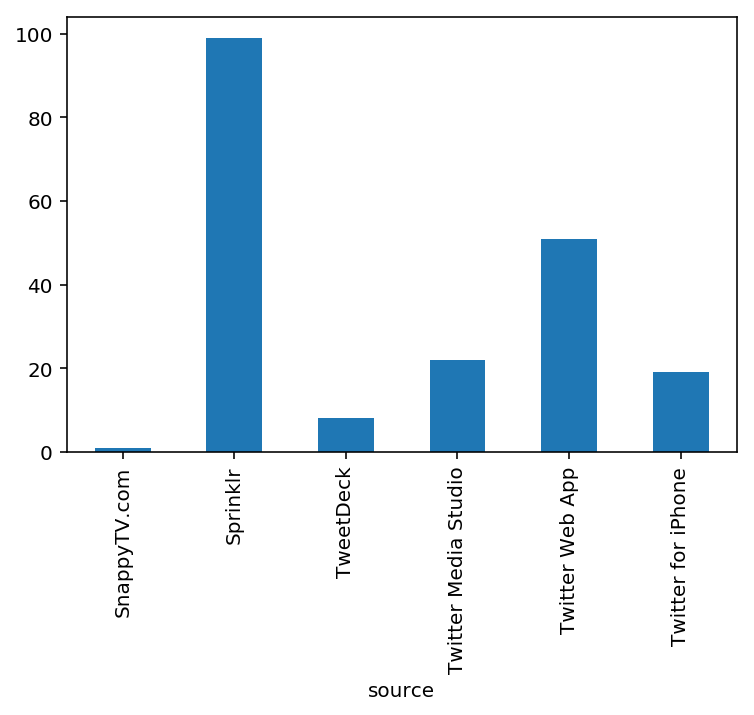

In [71]:
source_freq.plot.bar(x = "source", y = "id")

Seems, Nasa using Sprinklr platform always

In [72]:
df.groupby("source").count()["id"]

source
SnappyTV.com             1
Sprinklr                99
TweetDeck                8
Twitter Media Studio    22
Twitter Web App         51
Twitter for iPhone      19
Name: id, dtype: int64

In [73]:
df.groupby(["source","tweet_hour","tweet_days"])[["tweet_hour"]].count()

tweet_hour
source             tweet_hour tweet_days            
SnappyTV.com       9          Friday               1
Sprinklr           0          Friday               3
                              Saturday             1
                              Wednesday            3
                   1          Monday               1
...                                              ...
Twitter for iPhone 21         Wednesday            1
                   22         Monday               1
                   23         Saturday             1
                              Sunday               1
                              Tuesday              1

[145 rows x 1 columns]

# Analysing Friends and Folowers

In [74]:
user = api.get_user(id = "NASA")

In [75]:
for friend in user.friends():
    print(friend.screen_name)

AEM_mx
jmorhard
Explornaut
isro
ILSpaceAgency
ASI_spazio
HiRISE
USGSLandsat
GLOBEProgram
esaspaceflight
ESA_EO
AusSpaceAgency
astro_josh
AstroDrewMorgan
NASAFltDirector
WHOSTP
EarthKAM_Live
AstroRayJ
Astro_FarmerBob
Alaskan_Astro


In [76]:
friends = user.friends()
followers = user.followers()

In [77]:
def df_followers(takipci):
    idler = [person.id for person  in followers]
    df = pd.DataFrame(idler, columns = ["id"])
    
    df["created_at"] = [person.created_at for person in followers] #created account date
    df["screen_name"] = [person.screen_name for person in followers] #user name follower
    df["location"] = [person.location for person in followers] #follower location
    df["followers_count"] = [person.followers_count for person in followers] #follower count of follower
    df["statuses_count"] = [person.statuses_count for person in followers] #tweets count of follower
    df["friends_count"] = [person.friends_count for person in followers] #friends count of follower
    df["favourites_count"] = [person.favourites_count for person in followers] #favorites count of follower
    
    return df

In [78]:
DataFrame = df_followers(followers)

In [79]:

DataFrame.head()

,id,created_at,screen_name,location,followers_count,statuses_count,friends_count,favourites_count
0,1168331153310408709,2019-09-02 01:13:57,ChrisFish,,0,0,6,0
1,1203403072820699137,2019-12-07 19:58:42,PascalWeinmayer,,0,0,7,0
2,1203403106404446211,2019-12-07 19:57:30,Mehdisd7,,0,0,32,0
3,1202931286471565313,2019-12-06 12:44:03,KuhaMangov,,0,0,4,0
4,1203401216555769856,2019-12-07 19:50:14,DemaisipJames,,0,0,48,0


we can find followers location, favorite, using time and more analytical procces

## Followers Segmentation
real life solution

In [80]:
DataFrame.head()

,id,created_at,screen_name,location,followers_count,statuses_count,friends_count,favourites_count
0,1168331153310408709,2019-09-02 01:13:57,ChrisFish,,0,0,6,0
1,1203403072820699137,2019-12-07 19:58:42,PascalWeinmayer,,0,0,7,0
2,1203403106404446211,2019-12-07 19:57:30,Mehdisd7,,0,0,32,0
3,1202931286471565313,2019-12-06 12:44:03,KuhaMangov,,0,0,4,0
4,1203401216555769856,2019-12-07 19:50:14,DemaisipJames,,0,0,48,0


In [81]:
DataFrame.index = DataFrame["screen_name"]

In [82]:
DataFrame.head()

,id,created_at,screen_name,location,followers_count,statuses_count,friends_count,favourites_count
screen_name,,,,,,,,
ChrisFish,1168331153310408709,2019-09-02 01:13:57,ChrisFish,,0,0,6,0
PascalWeinmayer,1203403072820699137,2019-12-07 19:58:42,PascalWeinmayer,,0,0,7,0
Mehdisd7,1203403106404446211,2019-12-07 19:57:30,Mehdisd7,,0,0,32,0
KuhaMangov,1202931286471565313,2019-12-06 12:44:03,KuhaMangov,,0,0,4,0
DemaisipJames,1203401216555769856,2019-12-07 19:50:14,DemaisipJames,,0,0,48,0


In [83]:
#distribution data
s_data = DataFrame[["followers_count", "statuses_count"]]

In [84]:
s_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, ChrisFish to sizofrenstalker
Data columns (total 2 columns):
followers_count    20 non-null int64
statuses_count     20 non-null int64
dtypes: int64(2)
memory usage: 480.0+ bytes


In [85]:
#see distrubition
s_data

,followers_count,statuses_count
screen_name,,
ChrisFish,0,0
PascalWeinmayer,0,0
Mehdisd7,0,0
KuhaMangov,0,0
DemaisipJames,0,0
avbmelinda,35,37
Siddhar72135107,0,0
KrzystonAngelo,0,0
thelastalex11,0,1


In [86]:
#change zeros values
s_data["followers_count"] = s_data["followers_count"] + 0.01
s_data["statuses_count"] = s_data["statuses_count"] + 0.01

In [87]:
s_data

,followers_count,statuses_count
screen_name,,
ChrisFish,0.01,0.01
PascalWeinmayer,0.01,0.01
Mehdisd7,0.01,0.01
KuhaMangov,0.01,0.01
DemaisipJames,0.01,0.01
avbmelinda,35.01,37.01
Siddhar72135107,0.01,0.01
KrzystonAngelo,0.01,0.01
thelastalex11,0.01,1.01


In [88]:
6.01 * 1.01 

6.0701

In [89]:
4.01 * 39.01

156.43009999999998

In [90]:
3 * 0.01

0.03

we will do to evaluate the relative effects of the number of followers and the number of tweets

In [91]:
#standard
s_data = s_data.apply(lambda x: (x-min(x))/(max(x)-min(x)))

In [92]:
s_data["followers_count"] = s_data["followers_count"] + 0.01
s_data["statuses_count"] = s_data["statuses_count"] + 0.01

very followers but few tweets
too tweet but few followers
they make misdirection, so both variables are important to us so we must reduce the effect of zero.

In [93]:
s_data.head()

,followers_count,statuses_count
screen_name,,
ChrisFish,0.01,0.01
PascalWeinmayer,0.01,0.01
Mehdisd7,0.01,0.01
KuhaMangov,0.01,0.01
DemaisipJames,0.01,0.01


In [94]:
skor = s_data["followers_count"] * s_data["statuses_count"]

In [95]:
skor

screen_name
ChrisFish          0.000100
PascalWeinmayer    0.000100
Mehdisd7           0.000100
KuhaMangov         0.000100
DemaisipJames      0.000100
avbmelinda         0.001299
Siddhar72135107    0.000100
KrzystonAngelo     0.000100
thelastalex11      0.000104
Alejand83793163    0.000100
BwoyFrm            0.000100
kongsgaard         0.172761
janieorr           0.040429
EmmanuelFabode     0.001226
AnkleBears         0.000104
muhammadeid98      0.000134
AndreIllustrate    0.734467
mercedescondor3    0.000184
Santosh54017738    0.000104
sizofrenstalker    0.000538
dtype: float64

In [96]:
#descending
skor.sort_values(ascending = False)

screen_name
AndreIllustrate    0.734467
kongsgaard         0.172761
janieorr           0.040429
avbmelinda         0.001299
EmmanuelFabode     0.001226
sizofrenstalker    0.000538
mercedescondor3    0.000184
muhammadeid98      0.000134
AnkleBears         0.000104
Santosh54017738    0.000104
thelastalex11      0.000104
DemaisipJames      0.000100
PascalWeinmayer    0.000100
Mehdisd7           0.000100
KuhaMangov         0.000100
Alejand83793163    0.000100
Siddhar72135107    0.000100
KrzystonAngelo     0.000100
BwoyFrm            0.000100
ChrisFish          0.000100
dtype: float64

In [97]:
skor[skor > skor.median() + skor.std()/len(skor)].sort_values(ascending = False)

screen_name
AndreIllustrate    0.734467
kongsgaard         0.172761
janieorr           0.040429
dtype: float64

In [98]:
skor.std()

0.16632031458900745

In [99]:
skor.median()

0.00010437636761487965

In [100]:
s_data["skor"] = skor

In [101]:
s_data

,followers_count,statuses_count,skor
screen_name,,,
ChrisFish,0.010000,0.010000,0.000100
PascalWeinmayer,0.010000,0.010000,0.000100
Mehdisd7,0.010000,0.010000,0.000100
KuhaMangov,0.010000,0.010000,0.000100
DemaisipJames,0.010000,0.010000,0.000100
avbmelinda,0.049593,0.026193,0.001299
Siddhar72135107,0.010000,0.010000,0.000100
KrzystonAngelo,0.010000,0.010000,0.000100
thelastalex11,0.010000,0.010438,0.000104


In [102]:

import numpy as np
s_data["segment"] = np.where(s_data["skor"] >= skor.median() + 
                             skor.std()/len(skor), "A","B")

In [103]:
s_data

,followers_count,statuses_count,skor,segment
screen_name,,,,
ChrisFish,0.010000,0.010000,0.000100,B
PascalWeinmayer,0.010000,0.010000,0.000100,B
Mehdisd7,0.010000,0.010000,0.000100,B
KuhaMangov,0.010000,0.010000,0.000100,B
DemaisipJames,0.010000,0.010000,0.000100,B
avbmelinda,0.049593,0.026193,0.001299,B
Siddhar72135107,0.010000,0.010000,0.000100,B
KrzystonAngelo,0.010000,0.010000,0.000100,B
thelastalex11,0.010000,0.010438,0.000104,B


# Hashtag Analysis

In [104]:
#see available trends for my api
api.trends_available()

[{'name': 'Worldwide',
  'placeType': {'code': 19, 'name': 'Supername'},
  'url': 'http://where.yahooapis.com/v1/place/1',
  'parentid': 0,
  'country': '',
  'woeid': 1,
  'countryCode': None},
 {'name': 'Winnipeg',
  'placeType': {'code': 7, 'name': 'Town'},
  'url': 'http://where.yahooapis.com/v1/place/2972',
  'parentid': 23424775,
  'country': 'Canada',
  'woeid': 2972,
  'countryCode': 'CA'},
 {'name': 'Ottawa',
  'placeType': {'code': 7, 'name': 'Town'},
  'url': 'http://where.yahooapis.com/v1/place/3369',
  'parentid': 23424775,
  'country': 'Canada',
  'woeid': 3369,
  'countryCode': 'CA'},
 {'name': 'Quebec',
  'placeType': {'code': 7, 'name': 'Town'},
  'url': 'http://where.yahooapis.com/v1/place/3444',
  'parentid': 23424775,
  'country': 'Canada',
  'woeid': 3444,
  'countryCode': 'CA'},
 {'name': 'Montreal',
  'placeType': {'code': 7, 'name': 'Town'},
  'url': 'http://where.yahooapis.com/v1/place/3534',
  'parentid': 23424775,
  'country': 'Canada',
  'woeid': 3534,
  'co

In [105]:
#catch countries code of function
def country_code():
    places = api.trends_available()
    all_woeids = {place['name'].lower(): place['woeid'] for place in places}
    return all_woeids

In [106]:
country_code()

{'worldwide': 1,
 'winnipeg': 2972,
 'ottawa': 3369,
 'quebec': 3444,
 'montreal': 3534,
 'toronto': 4118,
 'edmonton': 8676,
 'calgary': 8775,
 'vancouver': 9807,
 'birmingham': 2364559,
 'blackpool': 12903,
 'bournemouth': 13383,
 'brighton': 13911,
 'bristol': 13963,
 'cardiff': 15127,
 'coventry': 17044,
 'derby': 18114,
 'edinburgh': 19344,
 'glasgow': 21125,
 'hull': 25211,
 'leeds': 26042,
 'leicester': 26062,
 'liverpool': 26734,
 'manchester': 28218,
 'middlesbrough': 28869,
 'newcastle': 30079,
 'nottingham': 30720,
 'plymouth': 32185,
 'portsmouth': 32452,
 'preston': 32566,
 'sheffield': 34503,
 'stoke-on-trent': 36240,
 'swansea': 36758,
 'london': 44418,
 'belfast': 44544,
 'santo domingo': 76456,
 'guatemala city': 83123,
 'acapulco': 110978,
 'aguascalientes': 111579,
 'chihuahua': 115958,
 'mexico city': 116545,
 'ciudad juarez': 116556,
 'nezahualcóyotl': 116564,
 'culiacán': 117994,
 'ecatepec de morelos': 118466,
 'guadalajara': 124162,
 'hermosillo': 124785,
 'león

In [107]:
#catch country codes by name
def country_woeid(country_name):
    country_name = country_name.lower()
    trends = api.trends_available()
    all_woeids = country_code()
    return all_woeids[country_name]
    

In [108]:
country_woeid("united states")

23424977

In [109]:
trends = api.trends_place(id = 23424977)

In [110]:
import json
print(json.dumps(trends, indent = 3))

[
   {
      "trends": [
         {
            "name": "Brother Nature",
            "url": "http://twitter.com/search?q=%22Brother+Nature%22",
            "promoted_content": null,
            "query": "%22Brother+Nature%22",
            "tweet_volume": 238849
         },
         {
            "name": "#Big12Championship",
            "url": "http://twitter.com/search?q=%23Big12Championship",
            "promoted_content": null,
            "query": "%23Big12Championship",
            "tweet_volume": null
         },
         {
            "name": "Baylor",
            "url": "http://twitter.com/search?q=Baylor",
            "promoted_content": null,
            "query": "Baylor",
            "tweet_volume": 33246
         },
         {
            "name": "#ManchesterDerby",
            "url": "http://twitter.com/search?q=%23ManchesterDerby",
            "promoted_content": null,
            "query": "%23ManchesterDerby",
            "tweet_volume": 41802
         },
         {
  

In [111]:
usa = api.trends_place(id = 23424977)
trends = usa[0]["trends"]

In [ ]:
for i in trends:
    print(i["name"])

### Collecting Data from Twitter by hashtag

In [113]:
#last tweet about #datascience
tweets = api.search(q = "#datascience", 
                      result_type = "recent", 
                     count = 1000)

In [114]:
def hashtag_df(tweets):
    import pandas as pd
    id_list = [tweet.id for tweet  in tweets]
    df = pd.DataFrame(id_list, columns = ["id"])
    
    df["text"] = [tweet.text for tweet in tweets]  #get tweet text
    df["created_at"] = [tweet.created_at for tweet in tweets] #get tweet created time
    df["retweeted"] = [tweet.retweeted for tweet in tweets] #get retweets
    df["retweet_count"] = [tweet.retweet_count for tweet in tweets] #get retweets 
    df["user_screen_name"] = [tweet.author.screen_name for tweet in tweets] #get tweet user screen name (not same screen name)
    df["user_followers_count"] = [tweet.author.followers_count for tweet in tweets] #get followers count
    df["user_location"] = [tweet.author.location for tweet in tweets] #get use location
    df["Hashtags"] = [tweet.entities.get('hashtags') for tweet in tweets] #get hastags
    
    return df

In [115]:
df = hashtag_df(tweets)

In [116]:
df.shape

(100, 9)

In [117]:
df.head()

,id,text,created_at,retweeted,retweet_count,user_screen_name,user_followers_count,user_location,Hashtags
0,1203404471574958081,RT @wiwer77: How AI is making an impact in hea...,2019-12-07 20:02:38,False,31,BoakyeTweets,327,"Miami, FL","[{'text': 'AI', 'indices': [79, 82]}, {'text':..."
1,1203404463702204416,RT @gp_pulipaka: Artificial Intelligence vs Ma...,2019-12-07 20:02:36,False,19,jjmareca,689,Geneva 🇨🇭 and 🌍,"[{'text': 'BigData', 'indices': [92, 100]}, {'..."
2,1203404449193922560,RT @wiwer77: How AI is making an impact in hea...,2019-12-07 20:02:33,False,31,cybersec_feeds,4991,Internet,"[{'text': 'AI', 'indices': [79, 82]}, {'text':..."
3,1203404413945053184,Data Scientist - 3 month FTC at OYO\n https://...,2019-12-07 20:02:25,False,0,saqibali_ca,49,"San Jose, CA","[{'text': 'UnitedKingdom', 'indices': [61, 75]..."
4,1203404317564252161,How Artificial Intelligence Can Set Meaningful...,2019-12-07 20:02:02,False,0,RichardEudes,14239,"Paris, France","[{'text': 'businessanalytics', 'indices': [83,..."


## Describe hashtags

### unique number of participants

In [118]:
df.head()

,id,text,created_at,retweeted,retweet_count,user_screen_name,user_followers_count,user_location,Hashtags
0,1203404471574958081,RT @wiwer77: How AI is making an impact in hea...,2019-12-07 20:02:38,False,31,BoakyeTweets,327,"Miami, FL","[{'text': 'AI', 'indices': [79, 82]}, {'text':..."
1,1203404463702204416,RT @gp_pulipaka: Artificial Intelligence vs Ma...,2019-12-07 20:02:36,False,19,jjmareca,689,Geneva 🇨🇭 and 🌍,"[{'text': 'BigData', 'indices': [92, 100]}, {'..."
2,1203404449193922560,RT @wiwer77: How AI is making an impact in hea...,2019-12-07 20:02:33,False,31,cybersec_feeds,4991,Internet,"[{'text': 'AI', 'indices': [79, 82]}, {'text':..."
3,1203404413945053184,Data Scientist - 3 month FTC at OYO\n https://...,2019-12-07 20:02:25,False,0,saqibali_ca,49,"San Jose, CA","[{'text': 'UnitedKingdom', 'indices': [61, 75]..."
4,1203404317564252161,How Artificial Intelligence Can Set Meaningful...,2019-12-07 20:02:02,False,0,RichardEudes,14239,"Paris, France","[{'text': 'businessanalytics', 'indices': [83,..."


In [119]:
df["user_screen_name"].unique().size

68

In [120]:
df.groupby("user_screen_name")["id"].count().sum()

100

text-based feature inferences that can be done with numeric-based feature inferences.

In [121]:
#Top contributors to hashtag
df.groupby("user_screen_name").count()["id"].sort_values(ascending = False)[0:5]

user_screen_name
BoakyeTweets      5
rstatstweet       5
botgopher         5
TheCuriousLuke    3
cybersec_feeds    3
Name: id, dtype: int64

In [122]:
#original contributors
df.head()

,id,text,created_at,retweeted,retweet_count,user_screen_name,user_followers_count,user_location,Hashtags
0,1203404471574958081,RT @wiwer77: How AI is making an impact in hea...,2019-12-07 20:02:38,False,31,BoakyeTweets,327,"Miami, FL","[{'text': 'AI', 'indices': [79, 82]}, {'text':..."
1,1203404463702204416,RT @gp_pulipaka: Artificial Intelligence vs Ma...,2019-12-07 20:02:36,False,19,jjmareca,689,Geneva 🇨🇭 and 🌍,"[{'text': 'BigData', 'indices': [92, 100]}, {'..."
2,1203404449193922560,RT @wiwer77: How AI is making an impact in hea...,2019-12-07 20:02:33,False,31,cybersec_feeds,4991,Internet,"[{'text': 'AI', 'indices': [79, 82]}, {'text':..."
3,1203404413945053184,Data Scientist - 3 month FTC at OYO\n https://...,2019-12-07 20:02:25,False,0,saqibali_ca,49,"San Jose, CA","[{'text': 'UnitedKingdom', 'indices': [61, 75]..."
4,1203404317564252161,How Artificial Intelligence Can Set Meaningful...,2019-12-07 20:02:02,False,0,RichardEudes,14239,"Paris, France","[{'text': 'businessanalytics', 'indices': [83,..."


In [123]:
df["text"].str.startswith("RT").head()

0     True
1     True
2     True
3    False
4    False
Name: text, dtype: bool

In [124]:
#Number of tweet - original contribution rate
df[~df["text"].str.startswith("RT")].count()["id"] / len(df)

0.18

In [125]:
#Number of retweet - original contribution rate
df[~df["text"].str.startswith("RT")].count()["id"] / df[df["text"].str.startswith("RT")].count()["id"]

0.21951219512195122

Number of retweet - original contribution rate is 0.25 percent 100 for datascience hastag

In [126]:
##most favorites and retweets

In [127]:
df.sort_values("retweet_count", ascending = False).head()

,id,text,created_at,retweeted,retweet_count,user_screen_name,user_followers_count,user_location,Hashtags
58,1203401457615196162,RT @EmmaQuindazzi: The 10 Big Vs for #BigData ...,2019-12-07 19:50:40,False,120,jfrf_voyager,375,"San Salvador, El Salvador","[{'text': 'BigData', 'indices': [37, 45]}, {'t..."
57,1203401573189091330,RT @EmmaQuindazzi: The 10 Big Vs for #BigData ...,2019-12-07 19:51:07,False,120,EmmaQuindazzi,169,"California, USA","[{'text': 'BigData', 'indices': [37, 45]}, {'t..."
49,1203401739531145216,RT @antgrasso: The Art of Thinking Like A Data...,2019-12-07 19:51:47,False,111,andrewmorrisuk,9305,Bedford,[]
60,1203401433191604224,RT @antgrasso: The Art of Thinking Like A Data...,2019-12-07 19:50:34,False,111,april_valencia,30,,[]
85,1203400698693660672,RT @KirkDBorne: This 10-page (PDF) #DataScienc...,2019-12-07 19:47:39,False,78,DigitalSalud1,533,,"[{'text': 'DataScience', 'indices': [35, 47]},..."


## Tweet-Time Distribution

In [128]:
tweets = api.search(q = "#datascience", lang = "en", count = 5000, result_type = "popular")

last code line is usind default setting as 'recent' parameter, if you want change this parameter you can find in tweepy doc. exp: popular or mix

In [129]:
?api.search

In [130]:
import pandas as pd
def hashtag_df(tweets):
    id_list = [tweet.id for tweet  in tweets]
    df = pd.DataFrame(id_list, columns = ["id"])
    
    df["text"] = [tweet.text for tweet in tweets] #get tweet text
    df["created_at"] = [tweet.created_at for tweet in tweets] #get tweet created time
    df["retweeted"] = [tweet.retweeted for tweet in tweets] #tweet of retweet
    df["retweet_count"] = [tweet.retweet_count for tweet in tweets] #retweet count
    df["source"] = [tweet.source for tweet in tweets] #tweet source (which one platform)
    df["user_screen_name"] = [tweet.author.screen_name for tweet in tweets] #tweet user name
    df["user_followers_count"] = [tweet.author.followers_count for tweet in tweets] #user followers count
    df["user_location"] = [tweet.author.location for tweet in tweets] #user location
    df["Hashtags"] = [tweet.entities.get('hashtags') for tweet in tweets] #tweet hastags
    
    return df

In [131]:
df = hashtag_df(tweets)

In [132]:
df.shape

(14, 10)

In [133]:
df["tweet_time"] = df["created_at"].apply(lambda x: x.strftime("%H"))

In [134]:
df.head()

,id,text,created_at,retweeted,retweet_count,source,user_screen_name,user_followers_count,user_location,Hashtags,tweet_time
0,1202977497228488704,INFOGRAPHIC: How much data is generated every ...,2019-12-06 15:46:00,False,142,TweetDeck,MIT_CSAIL,115723,"Cambridge, MA",[],15
1,1203311141801353216,This 10-page (PDF) #DataScience Cheat Sheet co...,2019-12-07 13:51:47,False,78,Twitter for iPhone,KirkDBorne,248378,"Maryland, USA","[{'text': 'DataScience', 'indices': [19, 31]},...",13
2,1203113084417650688,Data is not “the new oil”! It is a renewable a...,2019-12-07 00:44:46,False,45,Twitter for iPhone,KirkDBorne,248378,"Maryland, USA",[],00
3,1203310820651913219,Free download &gt;&gt; eBook (47-page PDF) — T...,2019-12-07 13:50:30,False,32,Twitter for iPhone,KirkDBorne,248378,"Maryland, USA","[{'text': 'Mathematics', 'indices': [49, 61]}]",13
4,1203070235751931904,[Slide deck] Infrastructure for Extreme Scale ...,2019-12-06 21:54:30,False,37,Twitter for iPhone,KirkDBorne,248378,"Maryland, USA","[{'text': 'MachineLearning', 'indices': [46, 6...",21


In [135]:
df["tweet_time"] = pd.to_numeric(df["tweet_time"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 11 columns):
id                      14 non-null int64
text                    14 non-null object
created_at              14 non-null datetime64[ns]
retweeted               14 non-null bool
retweet_count           14 non-null int64
source                  14 non-null object
user_screen_name        14 non-null object
user_followers_count    14 non-null int64
user_location           14 non-null object
Hashtags                14 non-null object
tweet_time              14 non-null int64
dtypes: bool(1), datetime64[ns](1), int64(4), object(5)
memory usage: 1.2+ KB


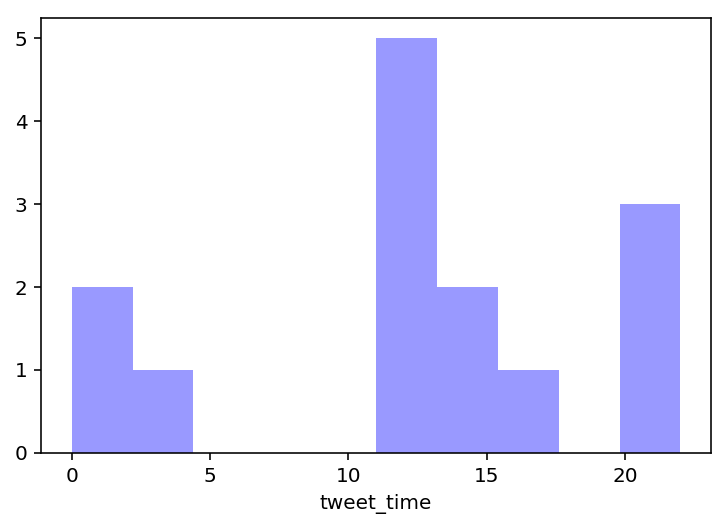

In [136]:
sns.distplot(df["tweet_time"], kde = False, color ="blue");

In [137]:
df["days"] = df["created_at"].dt.weekday_name

In [138]:
df.head()

,id,text,created_at,retweeted,retweet_count,source,user_screen_name,user_followers_count,user_location,Hashtags,tweet_time,days
0,1202977497228488704,INFOGRAPHIC: How much data is generated every ...,2019-12-06 15:46:00,False,142,TweetDeck,MIT_CSAIL,115723,"Cambridge, MA",[],15,Friday
1,1203311141801353216,This 10-page (PDF) #DataScience Cheat Sheet co...,2019-12-07 13:51:47,False,78,Twitter for iPhone,KirkDBorne,248378,"Maryland, USA","[{'text': 'DataScience', 'indices': [19, 31]},...",13,Saturday
2,1203113084417650688,Data is not “the new oil”! It is a renewable a...,2019-12-07 00:44:46,False,45,Twitter for iPhone,KirkDBorne,248378,"Maryland, USA",[],0,Saturday
3,1203310820651913219,Free download &gt;&gt; eBook (47-page PDF) — T...,2019-12-07 13:50:30,False,32,Twitter for iPhone,KirkDBorne,248378,"Maryland, USA","[{'text': 'Mathematics', 'indices': [49, 61]}]",13,Saturday
4,1203070235751931904,[Slide deck] Infrastructure for Extreme Scale ...,2019-12-06 21:54:30,False,37,Twitter for iPhone,KirkDBorne,248378,"Maryland, USA","[{'text': 'MachineLearning', 'indices': [46, 6...",21,Friday


In [139]:
df.groupby("days").count()["id"]

days
Friday      4
Saturday    8
Thursday    2
Name: id, dtype: int64

In [140]:
day_freq = df.groupby("days").count()["id"]

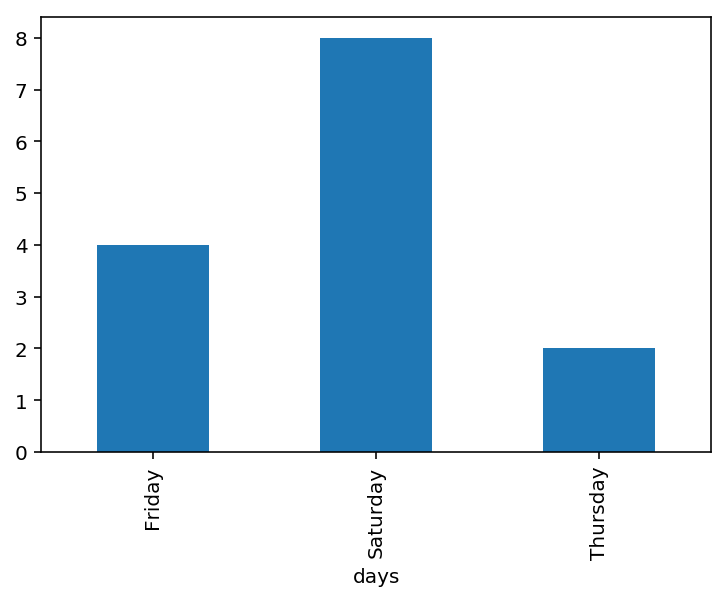

In [141]:
day_freq.plot.bar(x = "days", y = "id")

## Tweet Describing Disposal Resources

In [142]:
source_freq = df.groupby("source").count()["id"]

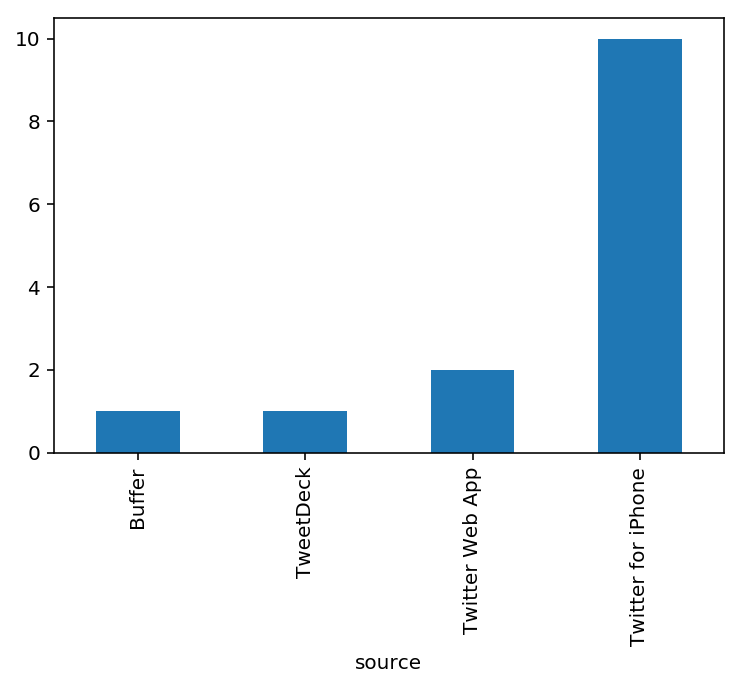

In [143]:
source_freq.plot.bar(x = "source", y = "id")

In [144]:
df.groupby("source").count()["id"]

source
Buffer                 1
TweetDeck              1
Twitter Web App        2
Twitter for iPhone    10
Name: id, dtype: int64